In [2]:
import pandas as pd

# Parquet 파일 경로
input_file = "seoul.parquet"

# 파일 읽기
df = pd.read_parquet(input_file, engine='pyarrow')  # 또는 engine='fastparquet'

# 원본 데이터 확인
print("Original Data:")
print(df.head())

Original Data:
                 상가업소번호       상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0  MA0101202210A0093845     이상한스냅  None        M1    과학·기술      M113   
1  MA010120220805430767       토끼정  None        I2       음식      I201   
2  MA010120220805430797       가배차  None        I2       음식      I201   
3  MA010120220805430812  비에이치씨항동점  None        I2       음식      I210   
4  MA010120220805430834   무지개삼성약국  None        G2       소매      G215   

    상권업종중분류명 상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0      사진 촬영    M11301    사진촬영업   M73303  ...  1147010300100090004000001   
1         한식    I20101   백반/한정식   I56111  ...  1150010500107740012000001   
2         한식    I20101   백반/한정식   I56111  ...  1171010400101430002012823   
3      기타 간이    I21006       치킨   I56193  ...  1153011200101000005000001   
4  의약·화장품 소매    G21501       약국   G47811  ...  1168011400106840005002734   

               건물명              도로명주소   구우편번호 신우편번호  동정보  층정보  호정보  \
0             백송주택  서울특별시

In [3]:
def preprocess_data(df):
    # 필요 없는 컬럼 제거
    columns_to_drop = [
        '지번부번지', '건물부번지', '동정보', '층정보', '호정보',
        '건물명', '건물관리번호', '구우편번호', '법정동코드', '행정동코드',
        '지번코드', '대지구분코드', '도로명', '도로명코드', '건물본번지',
        '지번본번지', '상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '시도코드'
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # 결측값 처리
    df['지점명'] = df['지점명'].fillna('본점')
    df = df.dropna(subset=['상호명', '표준산업분류코드', '표준산업분류명'])

    # 데이터 타입 변환
    df['경도'] = pd.to_numeric(df['경도'], errors='coerce')
    df['위도'] = pd.to_numeric(df['위도'], errors='coerce')

    # 이상값 제거
    df = df[(df['경도'] >= -180) & (df['경도'] <= 180) &
            (df['위도'] >= -90) & (df['위도'] <= 90)]

    # 상권 상태 분류
    df['상권상태'] = df.apply(
        lambda row: "중심상권" if row['위도'] > 37.5 and row['경도'] > 126.9 else "기타",
        axis=1
    )

    return df

# 전처리 작업
processed_df = preprocess_data(df)

# 전처리 결과 확인
print("Processed Data:")
print(processed_df.head())


Processed Data:
        상호명 지점명 상권업종대분류명   상권업종중분류명 상권업종소분류코드 상권업종소분류명 표준산업분류코드  \
0     이상한스냅  본점    과학·기술      사진 촬영    M11301    사진촬영업   M73303   
1       토끼정  본점       음식         한식    I20101   백반/한정식   I56111   
2       가배차  본점       음식         한식    I20101   백반/한정식   I56111   
3  비에이치씨항동점  본점       음식      기타 간이    I21006       치킨   I56193   
4   무지개삼성약국  본점       소매  의약·화장품 소매    G21501       약국   G47811   

          표준산업분류명    시도명  시군구코드 시군구명  행정동명 법정동명 대지구분명                  지번주소  \
0          사진 처리업  서울특별시  11470  양천구  신월5동  신월동    대지     서울특별시 양천구 신월동 9-4   
1      한식 일반 음식점업  서울특별시  11500  강서구  가양1동  마곡동    대지  서울특별시 강서구 마곡동 774-12   
2      한식 일반 음식점업  서울특별시  11710  송파구  송파1동  송파동    대지   서울특별시 송파구 송파동 143-2   
3          치킨 전문점  서울특별시  11530  구로구    항동   항동    대지    서울특별시 구로구 항동 100-5   
4  의약품 및 의료용품 소매업  서울특별시  11680  강남구  일원1동  일원동    대지   서울특별시 강남구 일원동 684-5   

               도로명주소  신우편번호          경도         위도  상권상태  
0  서울특별시 양천구 월정로 283   7902  126.828832  37.542

In [8]:
print(processed_df.dtypes)

상호명           object
지점명           object
상권업종대분류명      object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도명           object
시군구코드          int64
시군구명          object
행정동명          object
법정동명          object
대지구분명         object
지번주소          object
도로명주소         object
신우편번호          int64
경도           float64
위도           float64
상권상태          object
dtype: object


In [5]:
processed_df.isnull().sum()

상호명          0
지점명          0
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
표준산업분류코드     0
표준산업분류명      0
시도명          0
시군구코드        0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번주소         0
도로명주소        0
신우편번호        0
경도           0
위도           0
상권상태         0
dtype: int64

In [6]:
# '표준산업분류명' 컬럼의 값 확인
print(processed_df['표준산업분류명'].head(10))
print(processed_df['표준산업분류명'].dtype)
print(processed_df['표준산업분류명'].isnull().sum())


0             사진 처리업
1         한식 일반 음식점업
2         한식 일반 음식점업
3             치킨 전문점
4     의약품 및 의료용품 소매업
5             광고 대행업
6            자동차 임대업
7             커피 전문점
8    기타 기술 및 직업 훈련학원
9         한식 일반 음식점업
Name: 표준산업분류명, dtype: object
object
0


In [22]:
# Example input
input_example = '백반/한정식'  

In [19]:
def recommend_regions_sorted(df, input_example):
    # 데이터프레임을 '시도명', '행정동명', '상권업종중분류명', '상권업종소분류명'으로 그룹화하고 개수를 계산
    group_data = df.groupby(['시도명', '행정동명', '상권업종중분류명', '상권업종소분류명']).size().reset_index(name='count')
    
    # 각 지역에서 상권업종중분류명(중분류)의 총 개수를 계산
    middle_category_counts = group_data.groupby(['시도명', '행정동명', '상권업종중분류명'])['count'].sum().reset_index(name='middle_category_count')
    
    # 중분류 총 개수를 원본 데이터와 병합
    merged_data = pd.merge(group_data, middle_category_counts, 
                           on=['시도명', '행정동명', '상권업종중분류명'])
    
    # 입력된 소분류 값(input_example)에 해당하는 데이터만 필터링
    # .copy()는 선택적으로 사용할 수 있음(Pandas는 이 경우, 복사본인지 뷰(view)인지 확실하지 않기 때문에 경고)
    subcategory_data = merged_data[merged_data['상권업종소분류명'] == input_example].copy()
    
    # 각 지역에서 소분류가 중분류에서 차지하는 비율(subcategory_ratio)을 계산
    subcategory_data['subcategory_ratio'] = subcategory_data['count'] / subcategory_data['middle_category_count']
    
    # 비율(subcategory_ratio)을 기준으로 내림차순 정렬
    recommended_regions_sorted = subcategory_data.sort_values(by='subcategory_ratio', ascending=False)
    
    return recommended_regions_sorted

# 함수 호출: 데이터프레임과 분석할 소분류 값(input_example)을 전달
recommended_regions_sorted = recommend_regions_sorted(processed_df, input_example)

# 상위 10개 결과 출력
recommended_regions_sorted.head(10)


,시도명,행정동명,상권업종중분류명,상권업종소분류명,count,middle_category_count,subcategory_ratio
2106,서울특별시,개포1동,한식,백반/한정식,4,4,1.000000
45696,서울특별시,이촌2동,한식,백반/한정식,6,6,1.000000
18302,서울특별시,반포2동,한식,백반/한정식,12,14,0.857143
42075,서울특별시,오륜동,한식,백반/한정식,11,13,0.846154
16893,서울특별시,무악동,한식,백반/한정식,9,11,0.818182
2325,서울특별시,개포3동,한식,백반/한정식,20,26,0.769231
21693,서울특별시,부암동,한식,백반/한정식,20,26,0.769231
43026,서울특별시,용산2가동,한식,백반/한정식,26,34,0.764706
27349,서울특별시,서빙고동,한식,백반/한정식,13,17,0.764706
24529,서울특별시,삼청동,한식,백반/한정식,48,63,0.761905


In [20]:
def recommend_regions_with_ratio_and_middle_count(df, input_example):
    # 데이터프레임을 '시도명', '행정동명', '상권업종중분류명', '상권업종소분류명'으로 그룹화하여 개수(count)를 계산
    group_data = df.groupby(['시도명', '행정동명', '상권업종중분류명', '상권업종소분류명']).size().reset_index(name='count')
    
    # 각 지역에서 상권업종중분류명(중분류)의 총 개수를 계산
    middle_category_counts = group_data.groupby(['시도명', '행정동명', '상권업종중분류명'])['count'].sum().reset_index(name='middle_category_count')
    
    # 중분류 총 개수를 원본 데이터와 병합
    merged_data = pd.merge(group_data, middle_category_counts, 
                           on=['시도명', '행정동명', '상권업종중분류명'])
    
    # 입력된 소분류 값(input_subcategory)에 해당하는 데이터만 필터링하고 명시적으로 복사 생성
    subcategory_data = merged_data[merged_data['상권업종소분류명'] == input_example].copy()
    
    # 각 지역에서 소분류가 중분류에서 차지하는 비율(subcategory_ratio)을 계산
    subcategory_data['subcategory_ratio'] = subcategory_data['count'] / subcategory_data['middle_category_count']
    
    # 중분류 총 개수(middle_category_count)를 기준으로 내림차순 정렬
    recommended_regions = subcategory_data.sort_values(by='middle_category_count', ascending=False)
    
    return recommended_regions

# 함수 호출: 데이터프레임과 분석할 소분류 값(input_subcategory)을 전달
recommended_regions_with_ratio = recommend_regions_with_ratio_and_middle_count(processed_df, input_example)

# 상위 10개 결과 출력
recommended_regions_with_ratio.head(10)


,시도명,행정동명,상권업종중분류명,상권업종소분류명,count,middle_category_count,subcategory_ratio
40203,서울특별시,역삼1동,한식,백반/한정식,494,895,0.551955
50353,서울특별시,종로1.2.3.4가동,한식,백반/한정식,481,863,0.557358
39970,서울특별시,여의동,한식,백반/한정식,428,711,0.601969
27136,서울특별시,서교동,한식,백반/한정식,348,622,0.559486
777,서울특별시,가산동,한식,백반/한정식,227,485,0.468041
990,서울특별시,가양1동,한식,백반/한정식,221,462,0.478355
41391,서울특별시,영등포동,한식,백반/한정식,219,400,0.547500
8673,서울특별시,논현2동,한식,백반/한정식,183,384,0.476562
15763,서울특별시,명동,한식,백반/한정식,198,382,0.518325
28113,서울특별시,서초3동,한식,백반/한정식,202,368,0.548913


In [23]:
def recommend_regions_with_weighted_ratio(df, input_example):
    # 데이터프레임을 '시도명', '행정동명', '상권업종중분류명', '상권업종소분류명'으로 그룹화하여 개수(count)를 계산
    group_data = df.groupby(['시도명', '행정동명', '상권업종중분류명', '상권업종소분류명']).size().reset_index(name='count')
    
    # 각 지역에서 상권업종중분류명(중분류)의 총 개수를 계산
    middle_category_counts = group_data.groupby(['시도명', '행정동명', '상권업종중분류명'])['count'].sum().reset_index(name='middle_category_count')
    
    # 중분류 총 개수를 원본 데이터와 병합
    merged_data = pd.merge(group_data, middle_category_counts, 
                           on=['시도명', '행정동명', '상권업종중분류명'])
    
    # 입력된 소분류 값(input_example)에 해당하는 데이터만 필터링하고 명시적으로 복사 생성
    subcategory_data = merged_data[merged_data['상권업종소분류명'] == input_example].copy()
    
    # 각 지역에서 소분류가 중분류에서 차지하는 비율(subcategory_ratio)을 계산
    subcategory_data['subcategory_ratio'] = subcategory_data['count'] / subcategory_data['middle_category_count']
    
    # 중분류 총 개수를 기준으로 가중치(weight)를 계산 (총 개수를 전체 평균으로 나누기)
    average_middle_count = subcategory_data['middle_category_count'].mean()
    subcategory_data['weighted_middle_category'] = subcategory_data['middle_category_count'] / average_middle_count
    
    # 가중치를 subcategory_ratio에 더한 새로운 컬럼 생성
    subcategory_data['combined_score'] = subcategory_data['subcategory_ratio'] + subcategory_data['weighted_middle_category']
    
    # combined_score 기준으로 내림차순 정렬
    recommended_regions = subcategory_data.sort_values(by='combined_score', ascending=False)
    
    return recommended_regions

# 함수 호출: 데이터프레임과 분석할 소분류 값(input_example)을 전달
recommended_regions_with_weighted_ratio = recommend_regions_with_weighted_ratio(processed_df, input_example)

# 결과 출력
recommended_regions_with_weighted_ratio.head(10)


,시도명,행정동명,상권업종중분류명,상권업종소분류명,count,middle_category_count,subcategory_ratio,weighted_middle_category,combined_score
40203,서울특별시,역삼1동,한식,백반/한정식,494,895,0.551955,8.347007,8.898963
50353,서울특별시,종로1.2.3.4가동,한식,백반/한정식,481,863,0.557358,8.048567,8.605925
39970,서울특별시,여의동,한식,백반/한정식,428,711,0.601969,6.630975,7.232944
27136,서울특별시,서교동,한식,백반/한정식,348,622,0.559486,5.800937,6.360423
777,서울특별시,가산동,한식,백반/한정식,227,485,0.468041,4.523239,4.991280
990,서울특별시,가양1동,한식,백반/한정식,221,462,0.478355,4.308735,4.787090
41391,서울특별시,영등포동,한식,백반/한정식,219,400,0.547500,3.730506,4.278006
15763,서울특별시,명동,한식,백반/한정식,198,382,0.518325,3.562633,4.080958
8673,서울특별시,논현2동,한식,백반/한정식,183,384,0.476562,3.581286,4.057848
28113,서울특별시,서초3동,한식,백반/한정식,202,368,0.548913,3.432066,3.980979


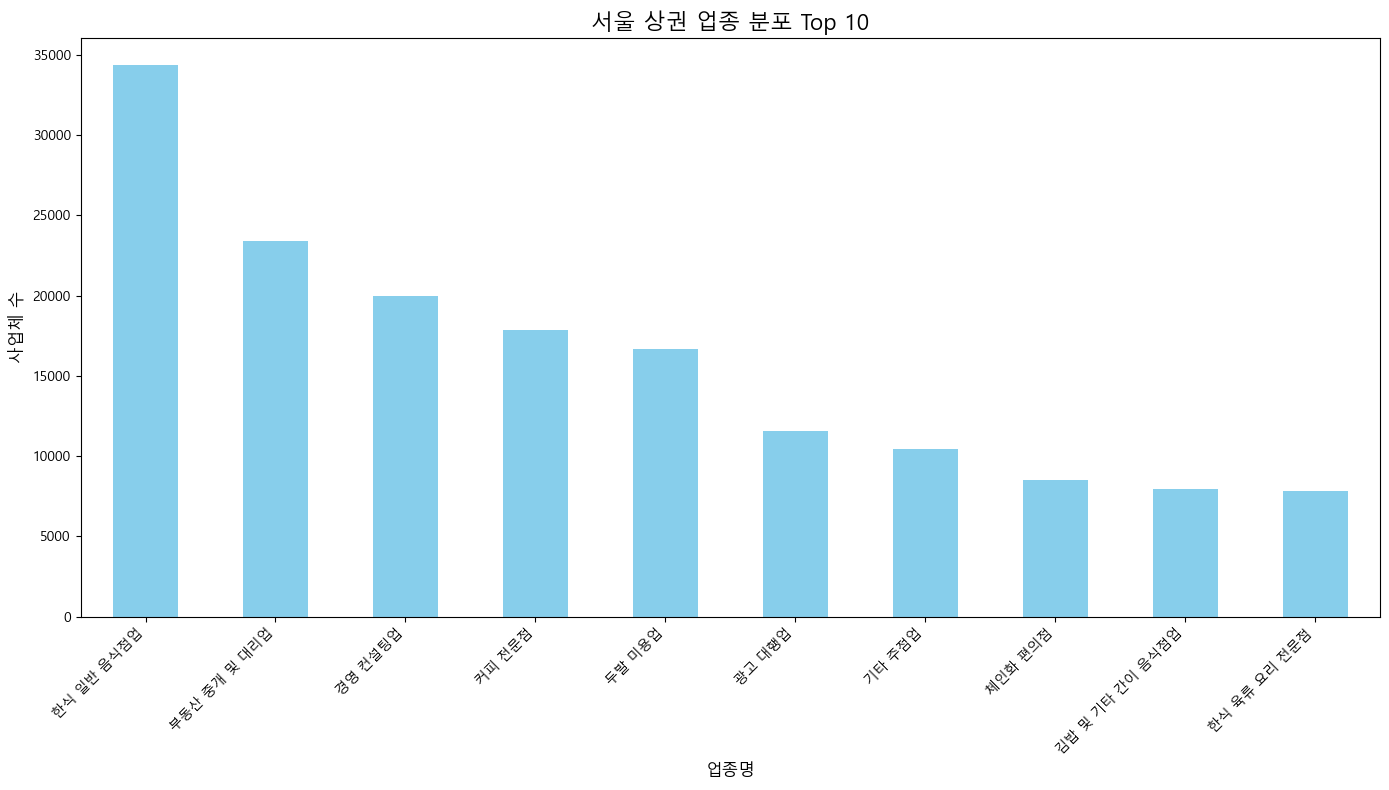

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정 (필요시 실행)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자


# 그래프 시각화
plt.figure(figsize=(14, 8))
processed_df['표준산업분류명'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('서울 상권 업종 분포 Top 10', fontsize=16)
plt.xlabel('업종명', fontsize=12)
plt.ylabel('사업체 수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
